# Exploratory Data Analysis

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings 

In [ ]:
sns.set_style('whitegrid')

In [ ]:
warnings.filterwarnings("ignore")

# Load data

In [5]:
df = pd.read_csv("../data/spotify.csv")

# Display data

In [ ]:
df.head()

In [ ]:
df.describe()

In [12]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [ ]:
print(df.keys())

👇 To see there is a NA value or not

In [ ]:
df.isnull().sum()

# Data cleaning

## 👆 have to remove those null values

Deleting Rows with Null Values in a Specific Column
using `dropna()`

In [26]:
df.dropna(subset=['track_name'], inplace=True)

lets verify for null values

In [27]:
# Visualizations
sns.distplot(df['track_popularity']).set_title('Popularity Distribution')
# (Continue adding visualizations as per your original code)
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

## 👆 now our data is clean

# Visualizations

### Visualizations of Aggregated Forms Based on Features

In [31]:
## listing the songs according to their tempo
result = df.groupby("track_artist")
print(result)

Text(0.5, 1.0, 'popularity distribution')

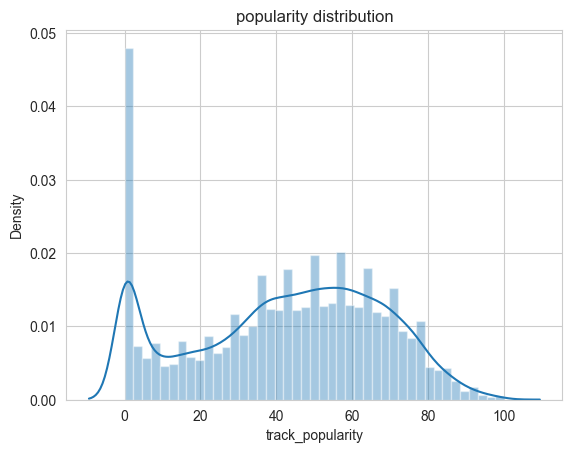

In [21]:
sns.distplot(df['track_popularity']).set_title('popularity distribution')

In [58]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')
print(numeric_df.keys())

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')


In [33]:
numeric_df.corr()

track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.064754 -0.108984 -0.000405   
danceability              0.064754      1.000000 -0.086074  0.011771   
energy                   -0.108984     -0.086074  1.000000  0.009972   
key                      -0.000405      0.011771  0.009972  1.000000   
loudness                  0.057717      0.025351  0.676662  0.000920   
mode                      0.010553     -0.058711 -0.004778 -0.173981   
speechiness               0.007067      0.181808 -0.032184  0.022462   
acousticness              0.085042     -0.024515 -0.539732  0.004378   
instrumentalness         -0.150003     -0.008658  0.033282  0.006022   
liveness                 -0.054593     -0.123899  0.161317  0.002834   
valence                   0.033278      0.330538  0.151050  0.019933   
tempo                    -0.005538     -0.184132  0.150072 -0.013316   
duration_ms              -0.143634     -0.096922  0.012560  0.015141   

                  loudness      mode  speechiness  acousticness  \
track_popularity  0.057717  0.010553     0.007067      0.085042   
danceability      0.025351 -0.058711     0.181808     -0.024515   
energy            0.676662 -0.004778    -0.032184     -0.539732   
key               0.000920 -0.173981     0.022462      0.004378   
loudness          1.000000 -0.019242     0.010313     -0.361646   
mode             -0.019242  1.000000    -0.063446      0.009399   
speechiness       0.010313 -0.063446     1.000000      0.026168   
acousticness     -0.361646  0.009399     0.026168      1.000000   
instrumentalness -0.147823 -0.006760    -0.103385     -0.006881   
liveness          0.077589 -0.005485     0.055337     -0.077247   
valence           0.053411  0.002567     0.064756     -0.016833   
tempo             0.093761  0.014339     0.044649     -0.112782   
duration_ms      -0.115039  0.015576    -0.089432     -0.081553   

                  instrumentalness  liveness   valence     tempo  duration_ms  
track_popularity         -0.150003 -0.054593  0.033278 -0.005538    -0.143634  
danceability             -0.008658 -0.123899  0.330538 -0.184132    -0.096922  
energy                    0.033282  0.161317  0.151050  0.150072     0.012560  
key                       0.006022  0.002834  0.019933 -0.013316     0.015141  
loudness                 -0.147823  0.077589  0.053411  0.093761    -0.115039  
mode                     -0.006760 -0.005485  0.002567  0.014339     0.015576  
speechiness              -0.103385  0.055337  0.064756  0.044649    -0.089432  
acousticness             -0.006881 -0.077247 -0.016833 -0.112782    -0.081553  
instrumentalness          1.000000 -0.005505 -0.175406  0.023303     0.063256  
liveness                 -0.005505  1.000000 -0.020432  0.020887     0.006197  
valence                  -0.175406 -0.020432  1.000000 -0.025639    -0.032292  
tempo                     0.023303  0.020887 -0.025639  1.000000    -0.001347  
duration_ms               0.063256  0.006197 -0.032292 -0.001347     1.000000

Text(0.5, 1.0, 'Popularity based on key')

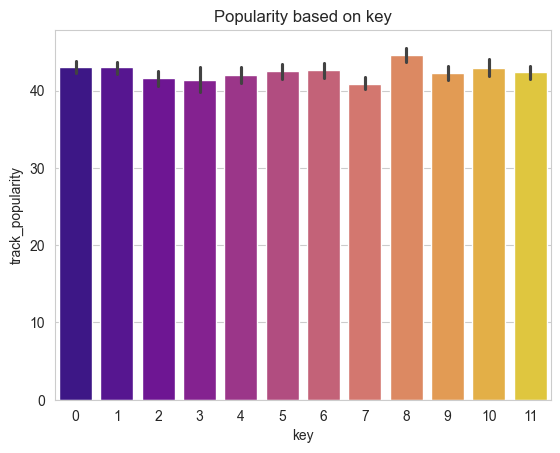

In [40]:
sns.barplot(x='key', y='track_popularity', data = df, palette='plasma')
plt.title('Popularity based on key')

Text(0.5, 1.0, 'Popularity based on mode')

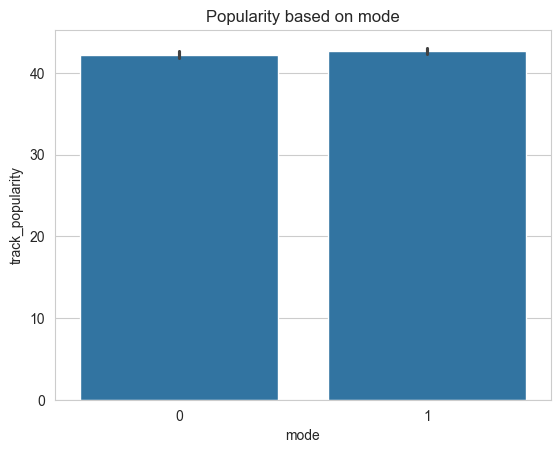

In [41]:
sns.barplot(x='mode', y='track_popularity', data = df)
plt.title('Popularity based on mode')

Text(0.5, 1.0, 'Popularity based on mode and key')

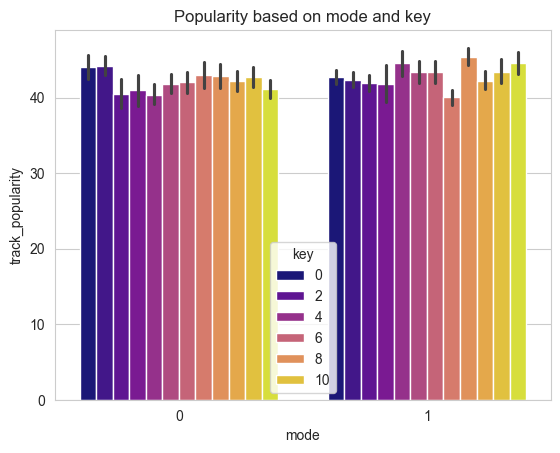

In [42]:
sns.barplot(x='mode', y='track_popularity',hue= 'key', data = df, palette='plasma')
plt.title('Popularity based on mode and key')

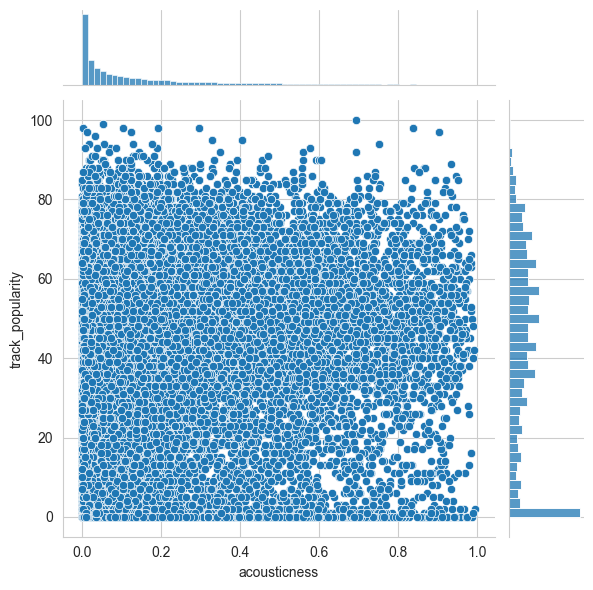

In [49]:
sns.jointplot(x='acousticness', y='track_popularity', data = df)

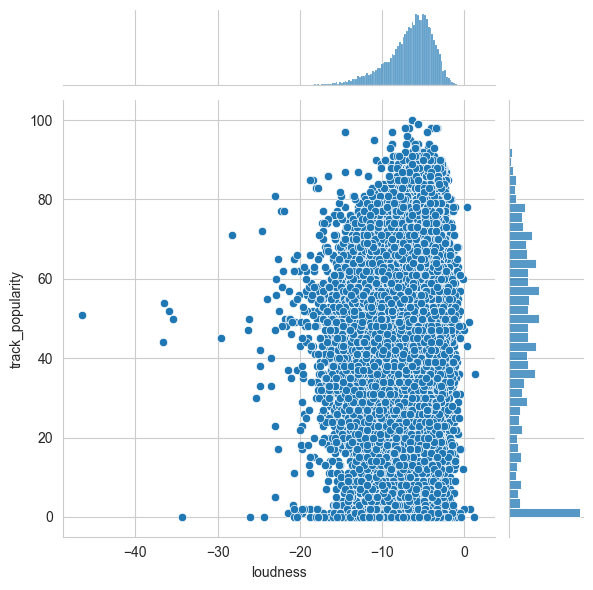

In [48]:
sns.jointplot(x='loudness', y='track_popularity', data = df)

Text(0.5, 1.0, 'acousticness\tfor song with more than 50  track_popularity')

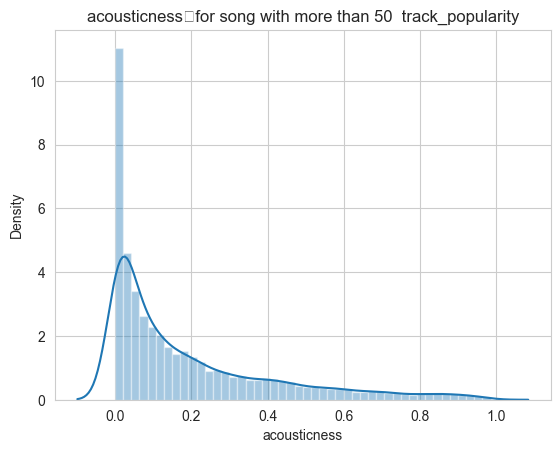

In [47]:
popular_above_50 = df[df.track_popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('acousticness	for song with more than 50  track_popularity')

Text(0.5, 1.0, 'acousticness\tfor song with less than 50  track_popularity')

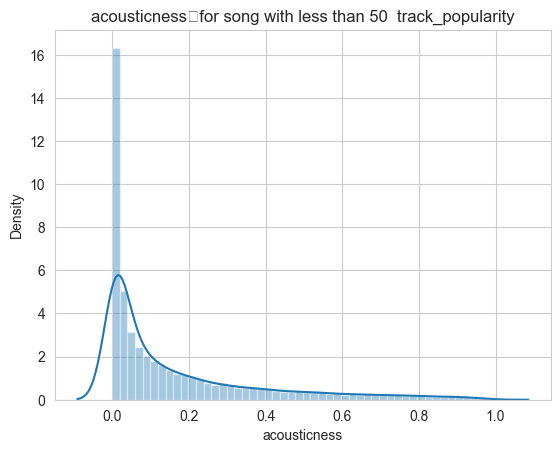

In [52]:
popular_below_50 = df[df['track_popularity']<50]
sns.distplot(popular_below_50['acousticness'])
plt.title('acousticness	for song with less than 50  track_popularity')

Text(0.5, 1.0, 'loudness\tfor song with more than 50  track_popularity')

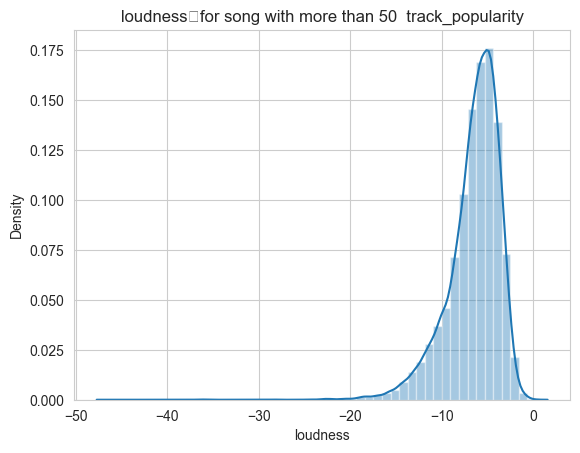

In [53]:
sns.distplot(popular_above_50['loudness'])
plt.title('loudness	for song with more than 50  track_popularity')

Text(0.5, 1.0, 'loudness\tfor song with less than 50  track_popularity')

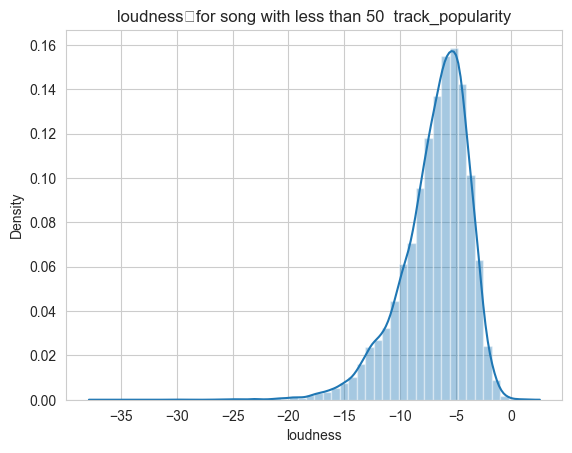

In [54]:
sns.distplot(popular_below_50['loudness'])
plt.title('loudness	for song with less than 50  track_popularity')

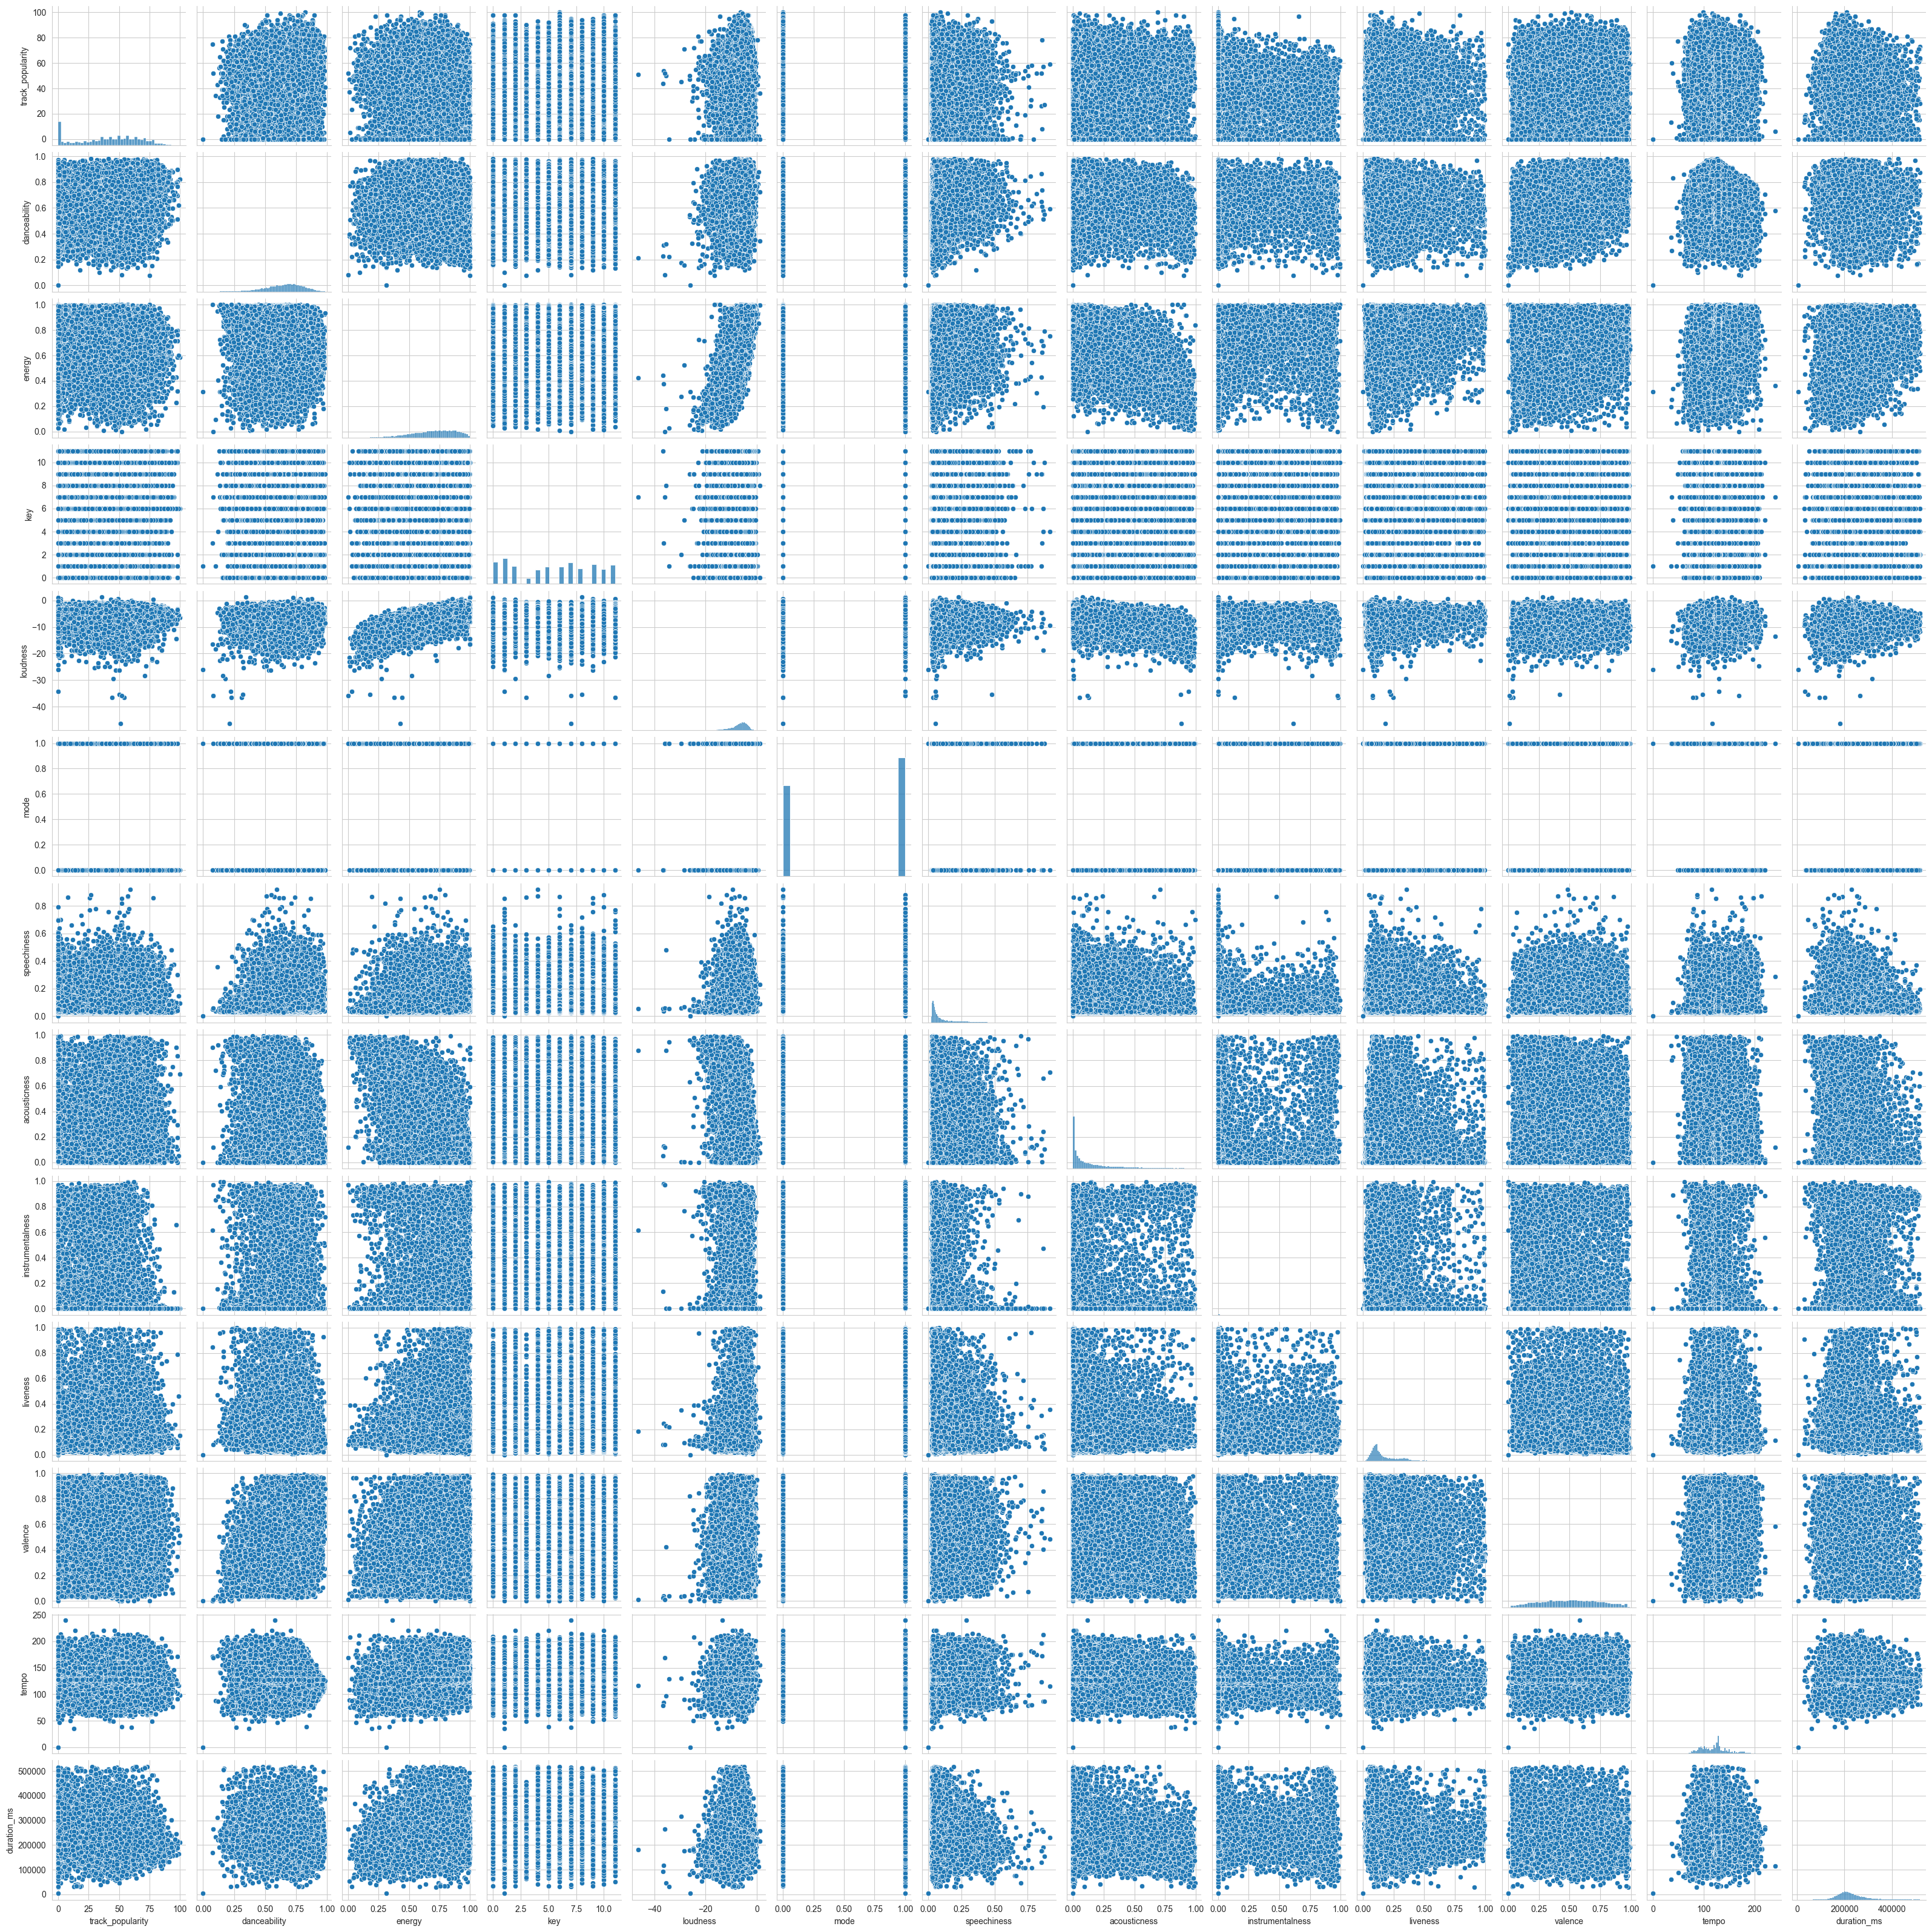

In [55]:
sns.pairplot(df)

In [59]:
df.to_csv("../data/processed.csv",index=False)